<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
Автор материала: Data Scientist в Segmento Екатерина Демидова. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 2. <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

**Заполните код в клетках и выберите ответы в [веб-форме](https://docs.google.com/forms/d/1exliJqAEZeBFewbiLT6nFGFU_ICAsUMtrJUMXF1-WNg/edit).**

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка и знакомство с данными

Для работы вам понадобятся данные из нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://inclass.kaggle.com/c/howpop-habrahabr-favs-lognorm). Файл **`howpop_train.csv`** уже лежит в нашем репозитории в каталоге **`data`**, но его можно скачать и с Kaggle.

In [2]:
df = pd.read_csv('../../data/howpop_train.csv')

In [3]:
df.shape

(134137, 17)

In [4]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [5]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [7]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/company/payler/blog/221781/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [8]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [9]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [10]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016,
* март 2015,
* апрель 2015,
* апрель 2016.

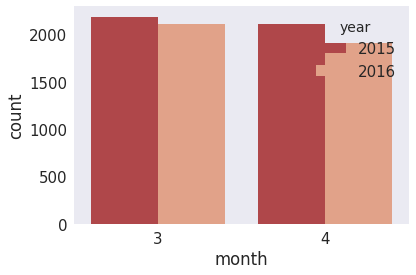

In [24]:
temp = df[df['month'].isin([3,4]) & df['year'].isin([2015,2016])]

# temp.groupby(['month', 'year'])['post_id'].count()

sns.countplot(x='month', hue='year', data=temp)

## 2\. Проанализируйте публикации в этом месяце (из вопроса 1)

Выберите один или несколько вариантов:

* На графике не заметны какие-либо выбросы или аномалии,
* Один или несколько дней сильно выделяются из общей картины,
* На хабре _всегда_ больше статей, чем на гиктаймсе,
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей.

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`

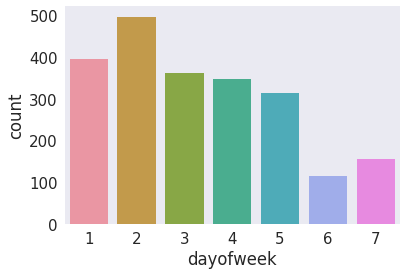

In [26]:
temp = df[(df['month'] == 3) & (df['year'] == 2015)]

# temp.groupby(['dayofweek'])['post_id'].count()

sns.countplot(x='dayofweek', data=temp)

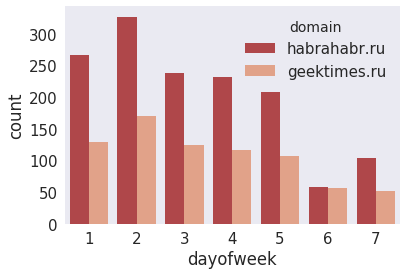

In [27]:
sns.countplot(x='dayofweek', hue='domain', data=temp)

## 3\. Выберите верное утверждение

* Больше всего просмотров (в среднем) набирают статьи, опубликованные в 12 часов дня;
* У опубликованных в 10 утра постов больше всего комментариев  (в среднем);
* Больше всего просмотров  (в среднем) набирают статьи, опубликованные в 6 часов утра;
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера;
* На хабре дневные статьи комментируют чаще  (в среднем), чем вечерние.

In [56]:
df.groupby('hour')['views'].mean().sort_values(ascending=False)

hour
6     21354.310115
4     20678.389091
7     19093.953408
3     18370.017972
22    18365.387460
20    18134.614873
1     17717.709114
23    17631.345932
21    17605.819064
0     17546.982349
2     17328.690581
5     17218.894242
19    16926.284287
9     16906.059099
18    16731.210843
16    16583.150731
10    16580.889909
11    16331.186818
12    16209.416141
8     16014.419048
13    15822.606055
17    15814.881313
14    15773.203785
15    14739.224017
Name: views, dtype: float64

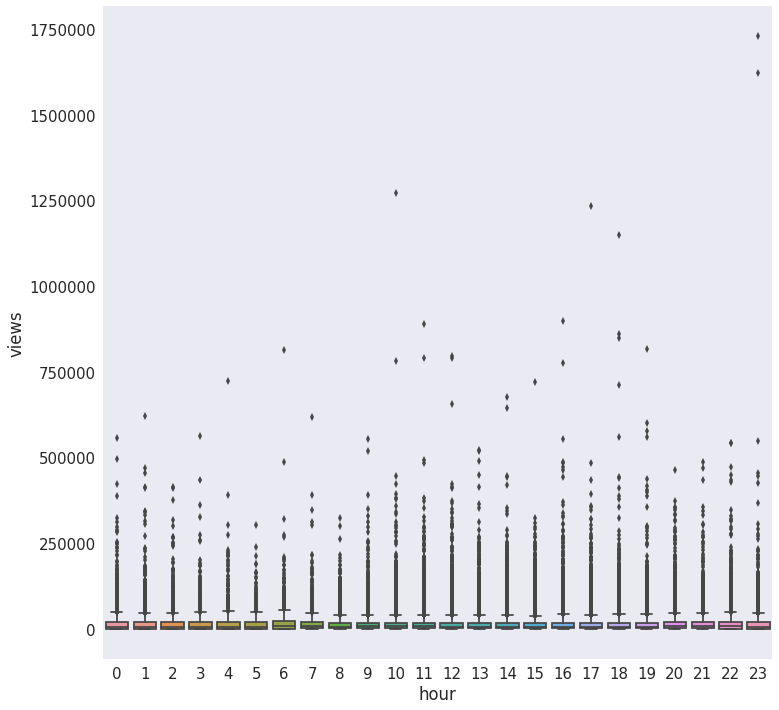

In [70]:
plt.subplots(figsize=(12,12))
sns.boxplot(x='hour', y='views', data=df)

In [58]:
df.groupby('hour')['comments'].mean().sort_values(ascending=False)

hour
4     53.657273
3     53.123877
6     51.799618
1     49.417910
2     48.827025
0     48.389066
5     47.816686
21    46.669970
22    46.373220
20    45.822556
23    45.212471
7     43.263561
19    41.832716
18    40.121553
17    39.046573
16    38.557664
9     37.303444
8     36.772222
14    36.131046
15    36.113566
13    35.811908
12    35.199744
11    34.768697
10    33.620052
Name: comments, dtype: float64

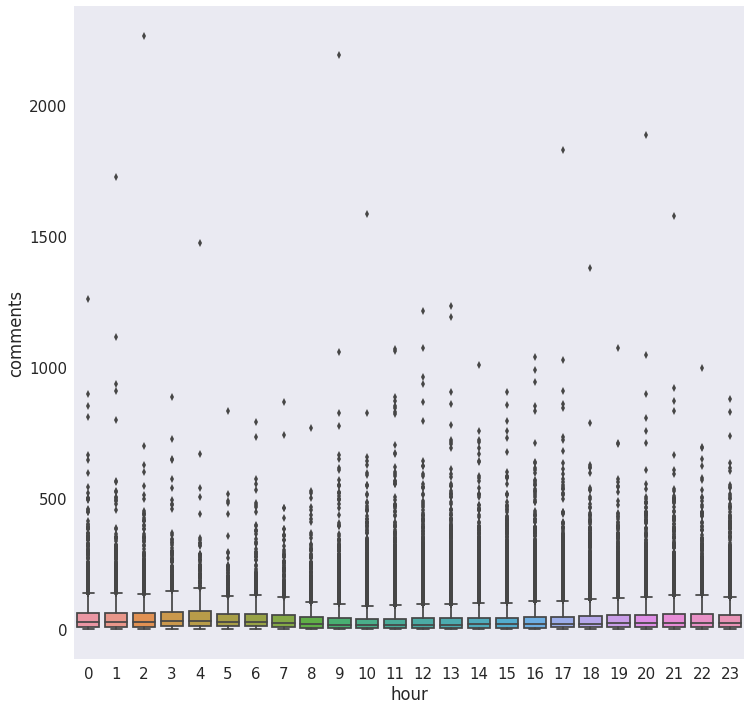

In [71]:
plt.subplots(figsize=(12,12))
sns.boxplot(x='hour', y='comments', data=df)

## 4\. Кого из топ-20 авторов (по числу статей) чаще всего минусуют (в среднем)?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [72]:
authors = ['@Mordatyj', '@Mithgol', '@alizar', '@ilya42']

df[df['author'].isin(authors)].groupby('author')['votes_minus'].mean()

author
@Mithgol     20.481081
@Mordatyj     7.471455
@alizar       7.928191
@ilya42       6.216797
Name: votes_minus, dtype: float64

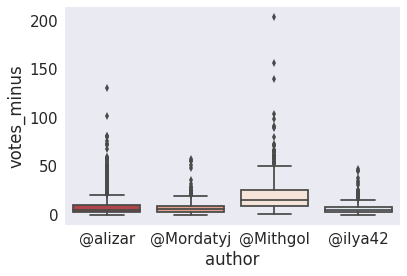

In [75]:
sns.boxplot(x='author', y='votes_minus', data=df[df['author'].isin(authors)])

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

In [73]:
df[df['dayofweek'].isin([1, 6])].groupby(['dayofweek', 'hour'])['post_id'].count()

dayofweek  hour
1          0        537
           1        415
           2        320
           3        209
           4        173
           5        111
           6        226
           7        279
           8        477
           9        962
           10      1467
           11      1862
           12      1994
           13      1915
           14      1895
           15      1823
           16      1694
           17      1537
           18      1404
           19      1077
           20       888
           21       835
           22       734
           23       802
6          0        492
           1        376
           2        263
           3        182
           4        107
           5        105
           6         69
           7         95
           8        118
           9        177
           10       237
           11       367
           12       449
           13       502
           14       519
           15       556
           16       479


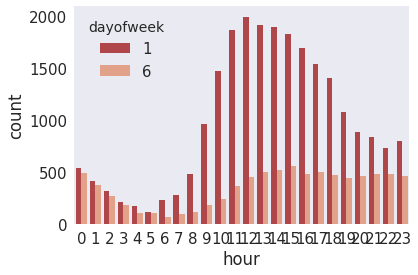

In [74]:
sns.countplot(x='hour', hue='dayofweek', data=df[df['dayofweek'].isin([1, 6])])